In [252]:
#import necessary libraries

#For Data Analysis
import pandas as pd
import numpy as np

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [253]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
df.shape

(7043, 21)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [260]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [262]:
# drop 'customerID' column

df = df.drop(['customerID'], axis=1)

In [264]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [266]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [268]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [270]:
df = df.drop_duplicates().reset_index(drop=True)
#To remove duplicated rows and columns

In [272]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [274]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [276]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [278]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [280]:
df["MonthlyCharges"] = df["MonthlyCharges"].replace({" ": "0.0"})

In [282]:
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float)

In [288]:
#filter dataframe based on the column
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [290]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [292]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Firstly, Insights about the data collected regarding ConnectTel:
# The CustomerID was dropped as it will not be needed for the Analysis
# Total number of Rows and Columns was identified
# No missing data in the dataset
# TotalCharges column had missing data which was replaced with '0'
# Datatype for 'TotalCharges' column was changed from 'object' to 'float

# There are some missing values in 'TotalCharges' which the len() was '11' and the 'tenure' was '0' which was must have been the
# first month a customer would have used the internet service and was not charged. Instead of deleting, change the TotalCharges datatype from object to float
# datatype. Also use 'replace' to sort the data.



### Exploratory Data Analysis

In [98]:
# This calculates the data for numerical column, SeniorCitizen is categorical column but represented as numbers.

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


### Reducing the Columns

## **Numerical Analysis**

In [100]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # Calculate Mean and Median values
    co_mean = df[column_name].mean()
    co_median = df[column_name].median()

    # Add vertical lines for mean and median
    plt.axvline(co_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(co_median, color="purple", linestyle="--", label="Median")

    plt.legend()
    plt.show()

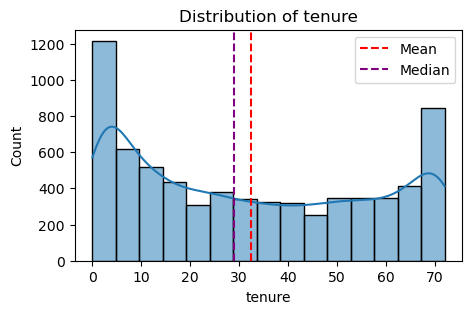

In [102]:
plot_histogram(df, "tenure")

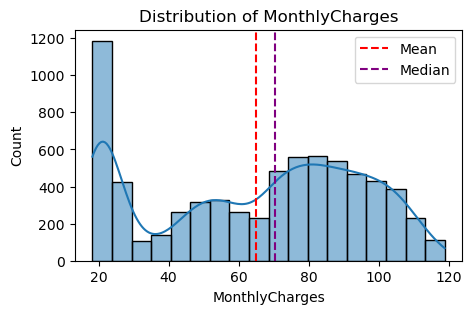

In [104]:
plot_histogram(df, "MonthlyCharges")

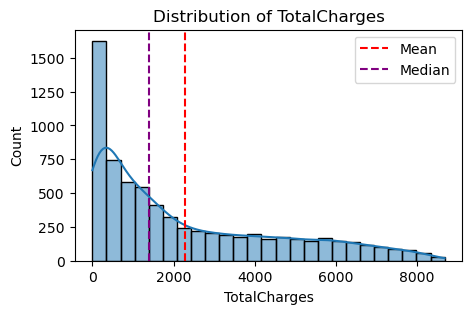

In [106]:
plot_histogram(df, "TotalCharges")

In [108]:
def plot_boxplot(df, column_name):
    
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show

    


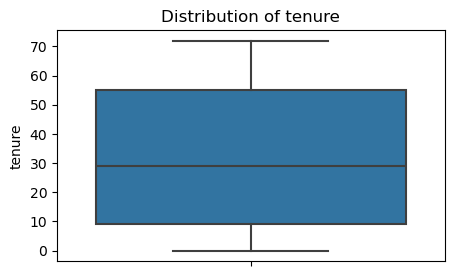

In [110]:
plot_boxplot(df, "tenure")


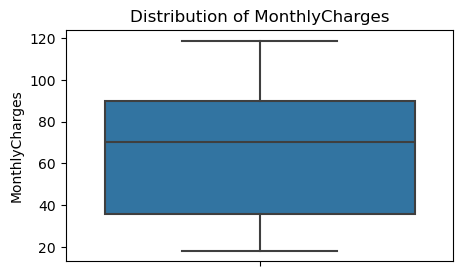

In [112]:
plot_boxplot(df, "MonthlyCharges")

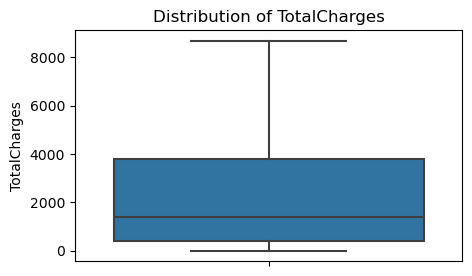

In [114]:
plot_boxplot(df, "TotalCharges")

## Correlation of heatmap with numerical data

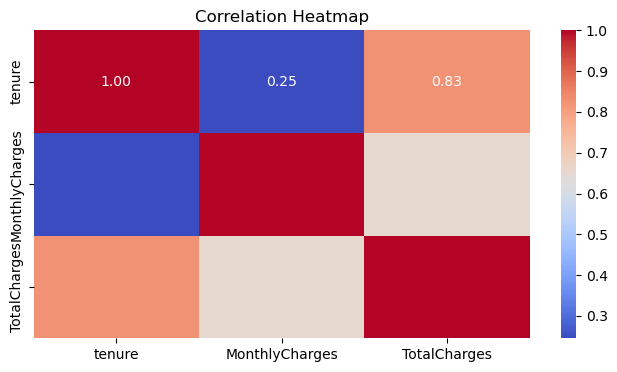

In [116]:
# Correlation matrix- Heatmap .2f(2 decimal place)--- 1 means- high positive correlation , 0 means high negative correlation
# Ensure TotalCharges is numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()





## Categorical Data Analysis


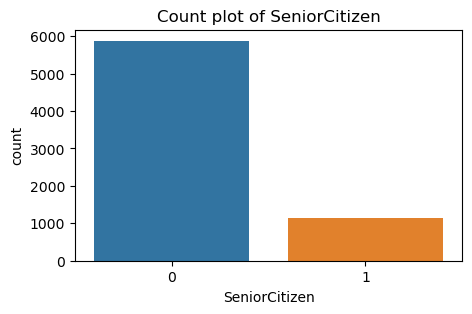

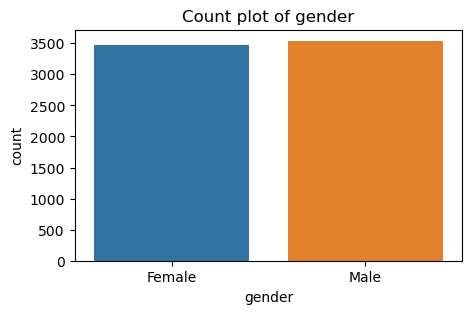

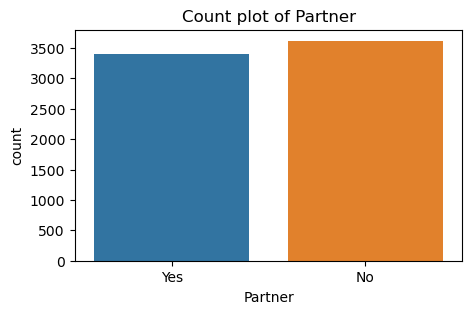

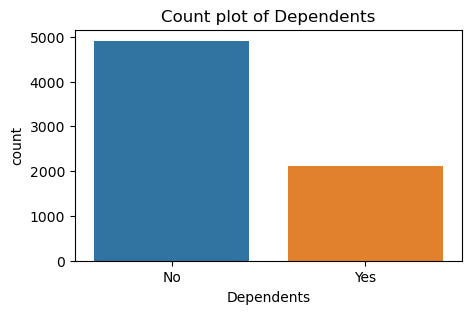

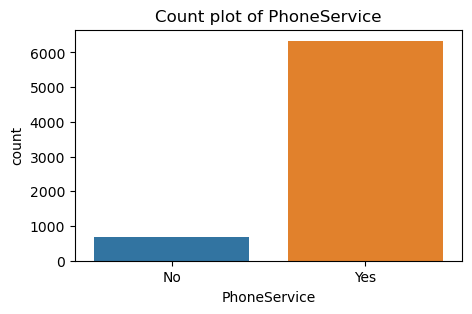

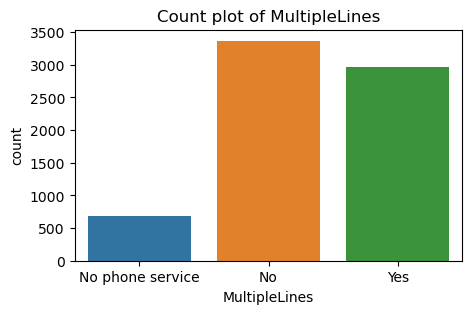

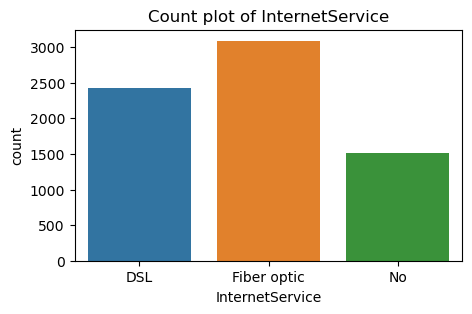

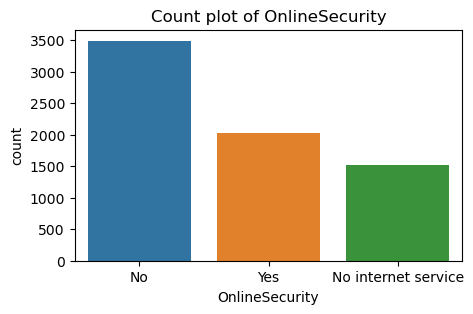

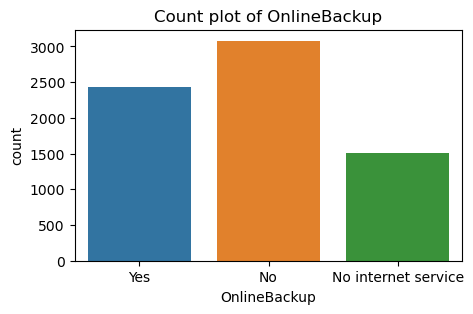

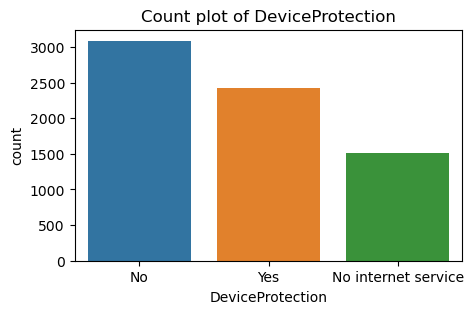

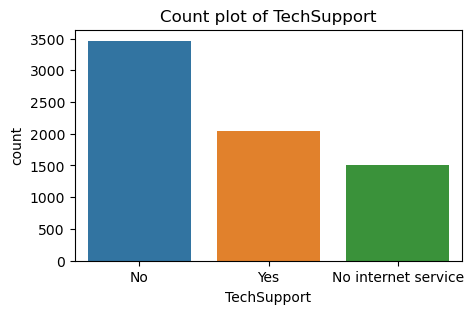

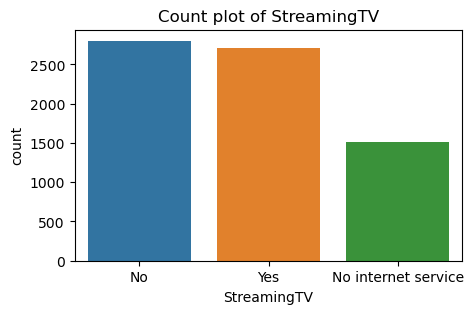

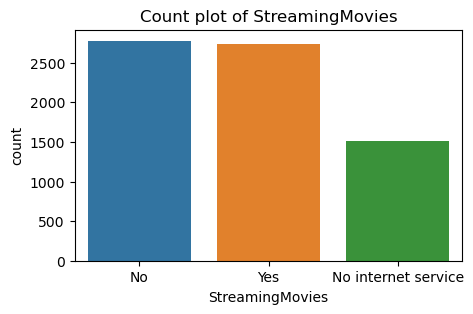

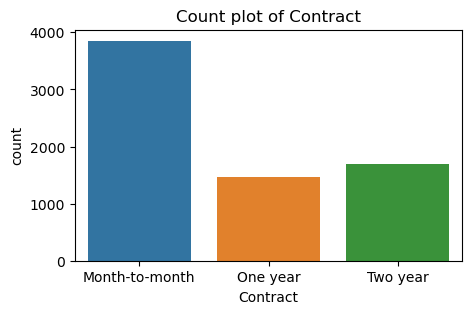

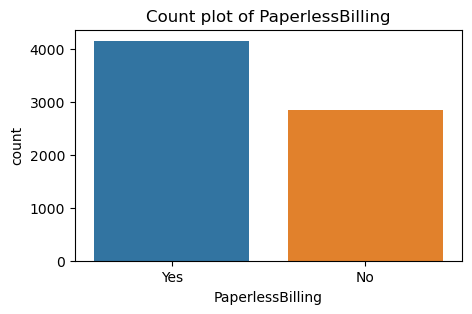

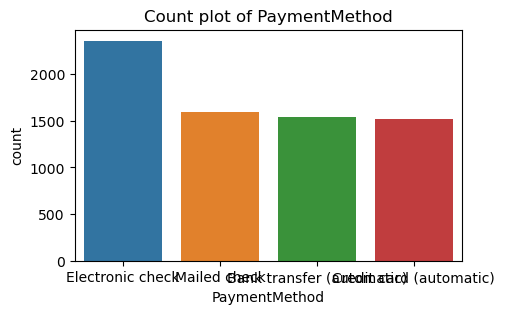

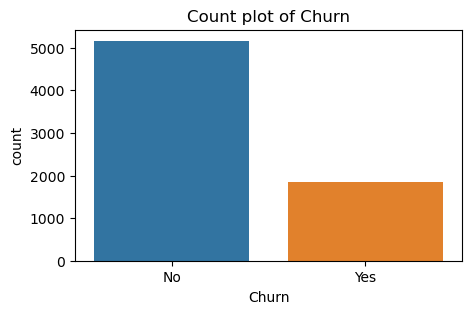

In [118]:
obj_col = df.select_dtypes(include="object").columns.to_list()
obj_col = ["SeniorCitizen"] + obj_col

for col in obj_col:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()
    

## Data Preprocessing

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [294]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [296]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [298]:
df["MonthlyCharges"] = df["MonthlyCharges"].replace({" ": "0.0"})

In [300]:
df1["MonthlyCharges"] = df1["MonthlyCharges"].astype(float)

# Problem Definition
# Customer churn is the process where customers stop using a company's products or services over a specific period. Connectel, a subscription-based model is set to retain customers and be outstanding in the competitive industries. 
# Retaining customers is essential for long-term growth and profitability. Elevated churn rates can signal customer dissatisfaction or the availability of more appealing alternatives in the market

# Business Problem
# The company is facing a significant churn rate, affecting both revenue and long-term customer loyalty. Identifying the key factors driving churn and predicting at-risk customers will empower the company to develop targeted strategies for customer retention..


## Objective:
Primary Goal: Develop a predictive model to accurately identify customers who are at risk of churning.
Secondary Goals:
Analyze historical customer data to identify key factors influencing churn.
Provide actionable insights to help the business reduce churn rates.
Suggest personalized retention strategies for high-risk customers.


# Key Questions to Address:

# Who is likely to churn?
Customers with shorter tenure are more likely to Churn than those with longer tenure.
Payment method – Electronic check payment may indicate higher Churn
Monthly Charges- Higher charges in the internet service may lead customers to migrate to competitors.

# What are the most significant factors contributing to chu
The most important factor contributing to the Customer churn is the type of contract the customer engagement, the month-to-month contract are more likely to churn than annual contracts.
Customer experience is another factor that can have great impact on the customers, service issues with internet such as low internet speed, network problem and reduced service will increase the likelihood of high Churn rates.
High Pricing- High pricing of a contract will lead to a high Churn rates as customers will migrate to other service providing internet service at a good rate.
Competition- Customers tend to move to companies with better offer rate and good internet service, this will lead to a high Churn rate.
rn?
# How can the company proactively engage at-risk customers to reduce
Company can pro-actively engage at-risk customer to reduce churn by providing rewards, discounts or free trials for a period of time before customer engages the service.
Company can encourage customer for a down grade instead on complete cancellation that will increase the rate of churn. For high valued customers, measures can be placed with the account managers to closely manage such accounts.
Conduct surveys to measure customer feedback, this will give knowledge of the pain point of the customer.
Regular emails and text messages to check with the performance and engagement of customers on social media 
 churn?
# What customer segments are most vulnerableThe customer segments most at risk of churn include new users, low-engagement customers, single users, and those experiencing billing issues. By proactively identifying these groups and implementing tailored retention strategies, businesses can minimize churn and enhance long-term customer loyalty. to churn?


## Dataset Requirements:
Customer Demographics: Age, gender, income level, etc.
Behavioral Data: Purchase history, usage patterns, interaction frequency.

Subscription Details: Duration, subscription type, renewal status.
Customer Support Interaction: Number of complaints, resolution time.
Churn Label: Indicates whether a customer has churned or not (for supervised learning).


## Expected Outcomes:
A machine learning model that predicts churn with high accuracy.
Identification of key churn drivers through exploratory data analysis.
Strategic recommendations for improving customer retention.


In [132]:
#Convert Total Charges to Numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert, setting invalid to NaN

In [134]:
#To fill up spaces from Nan to 0- #If conversion introduces NaN values,

# Option 1: Fill with 0
df['TotalCharges'].fillna(0, inplace=True)



## EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [136]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges'>

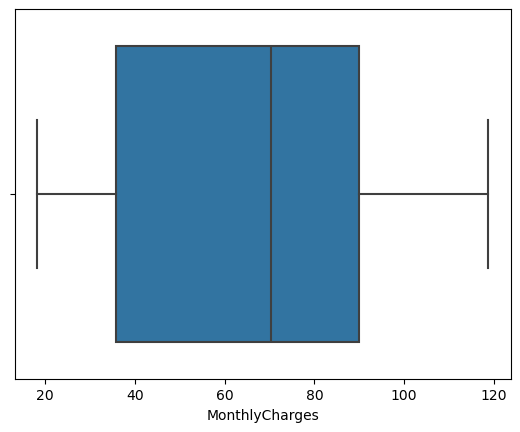

In [138]:
#check for outliers
sns.boxplot(x=df["MonthlyCharges"])

<Axes: xlabel='tenure'>

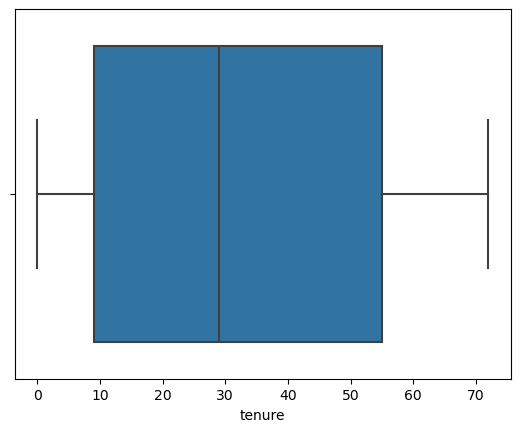

In [140]:
#check for outliers
sns.boxplot(x=df["tenure"])

Text(0.5, 1.0, 'Total Count of tenure')

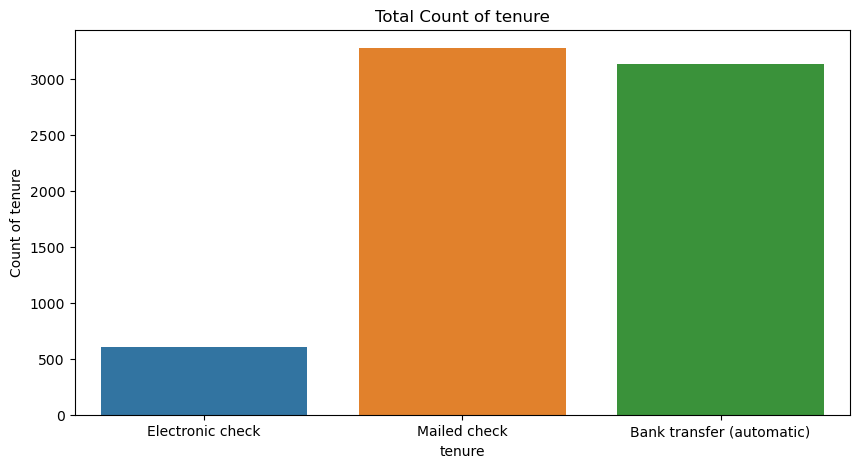

In [142]:
#Data Visualization
#tenure
def term(tenure):
    if tenure <= 1:
        return "Electronic check"
    elif tenure <= 34:
        return "Mailed check"
    elif tenure <= 45:
        return "Bank transfer (automatic)"
    else:
        return "Bank transfer (automatic)"


df['term'] = df['tenure'].apply(term)

#investigating age group patients
plt.figure(figsize = (10,5))
sns.countplot(x='term', data=df)
plt.xlabel('tenure')
plt.ylabel('Count of tenure')
plt.title('Total Count of tenure')


## BIVARIATE ANALYSIS

label
no    7021
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Dependents')

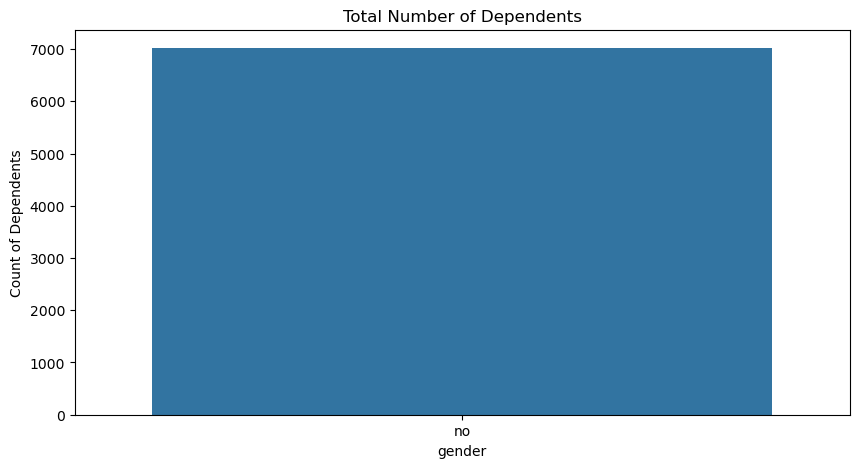

In [146]:
#Data Visualization
#Dependents (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "yes"
    else:
        return "no"


df['label'] = df['Dependents'].apply(label)
#total Dependents
print(df["label"].value_counts())

#investigating Dependents
plt.figure(figsize = (10,5))
sns.countplot(x='label', data=df)
plt.xlabel('gender')
plt.ylabel('Count of Dependents')
plt.title('Total Number of Dependents')

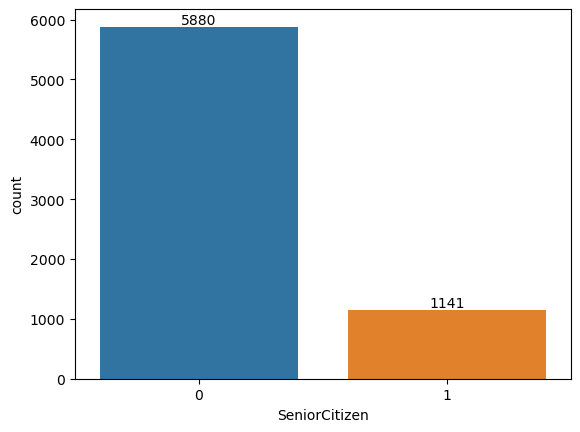

In [148]:
#Total SeniorCitizen or not
ax = sns.countplot(x=df["SeniorCitizen"], order=df["SeniorCitizen"].value_counts(ascending=False).index)
values = df["SeniorCitizen"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

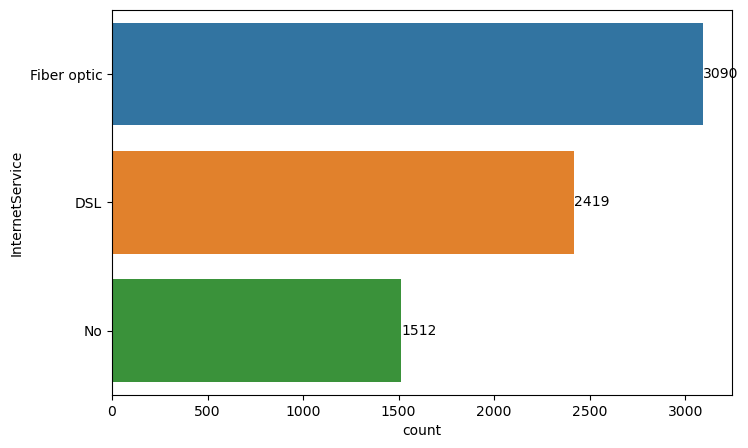

In [150]:
# InternetService
# The chart below shows that 'Fibre optic' had the highest count in internet service available to the client with a total of '3096' while DSL has '2421'
## while others internet service gives a total of 1526'
plt.figure(figsize=(8,5))

ax = sns.countplot(y=df["InternetService"], order=df["InternetService"].value_counts(ascending=False).index)
values = df["InternetService"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

## Machine Learning

## Data Preprocessing

In [152]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'term', 'label'],
      dtype='object')

In [154]:
from sklearn.preprocessing import LabelEncoder

In [156]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges']

X = df[features]
y = df['Churn']

In [158]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,term,label
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Electronic check,no
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Mailed check,no
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Mailed check,no
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Bank transfer (automatic),no
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Mailed check,no


In [160]:
# List of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

# Apply Label Encoding to binary categorical columns
label_encoder = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply One-Hot Encoding to categorical columns with multiple categories
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], 
                    drop_first=True)

# Display first few rows of transformed dataset
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ... TechSupport_Yes  \
0                 1           29.85         29.85      0  ...           False   
1                 0           56.95       1889.50      0  ...           False   
2                 1           53.85        108.15      1  ...           False   
3                 0           42.30       1840.75      0  ...            True   
4                 1           70.70        151.65      1  ...           False   

  StreamingTV_No internet service  StreamingTV_Yes  \
0                           Fals

In [162]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [214]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]  # Keep only these columns
y = df[['Churn']]

In [216]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
3269,0,0,0,0,4,1,1,79.15,317.25
6252,1,1,0,0,33,1,1,83.85,2716.30
1323,0,0,1,1,4,1,0,20.35,76.35
5190,1,0,0,0,9,1,1,19.90,164.60
4071,0,0,1,1,29,1,0,26.10,692.55
...,...,...,...,...,...,...,...,...,...
3772,1,0,0,0,29,1,0,19.10,529.50
5191,1,0,1,1,59,1,1,111.10,6555.20
5226,0,0,0,0,26,1,1,54.75,1406.90
5390,1,0,0,0,31,1,0,20.45,638.55


In [220]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
3909,1,0,1,1,20,1,1,90.20,1776.55
2462,1,0,1,1,49,1,1,97.95,4917.90
2879,1,1,0,0,67,1,1,116.10,7839.85
3761,0,0,1,0,57,1,0,19.90,1115.60
3745,1,0,0,0,1,0,0,29.15,29.15
...,...,...,...,...,...,...,...,...,...
3827,0,0,1,0,64,1,0,58.35,3756.45
3182,0,0,1,1,15,1,0,19.80,272.95
3089,0,0,1,0,71,0,1,61.40,4310.35
2579,0,0,1,0,58,1,1,65.25,3791.60


In [222]:
y_train

,Churn
3269,1
6252,1
1323,1
5190,0
4071,0
...,...
3772,0
5191,0
5226,0
5390,0


In [224]:
y_test

,Churn
3909,1
2462,0
2879,0
3761,0
3745,0
...,...
3827,0
3182,0
3089,0
2579,0


In [240]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on the training data and transform both train & test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the transformed data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (5616, 9)
X_test shape: (1405, 9)


In [228]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.797864768683274
Precision: 0.6148648648648649
Recall: 0.5170454545454546
F1-score: 0.5617283950617284
AUC-ROC: 0.7043916731416732


In [232]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

RandomForestClassifier
Accuracy: 0.797864768683274
Precision: 0.6148648648648649
Recall: 0.5170454545454546
F1-score: 0.5617283950617284
AUC-ROC: 0.7043916731416732


In [234]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.78


In [236]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")

XGBoost Accuracy: 0.77


In [238]:
# Train and Evaluate the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"🔹 {name} Performance Metrics:")
    print(f"   - Accuracy: {accuracy:.2f}")
    print(f"   - Precision: {precision:.2f}")
    print(f"   - Recall: {recall:.2f}")
    print(f"   - F1-score: {f1:.2f}")
    print(f"   - AUC-ROC: {auc_roc:.2f}")
    print("-" * 40)


🔹 Logistic Regression Performance Metrics:
   - Accuracy: 0.80
   - Precision: 0.61
   - Recall: 0.52
   - F1-score: 0.56
   - AUC-ROC: 0.83
----------------------------------------
🔹 Random Forest Performance Metrics:
   - Accuracy: 0.78
   - Precision: 0.56
   - Recall: 0.46
   - F1-score: 0.51
   - AUC-ROC: 0.79
----------------------------------------
🔹 XGBoost Performance Metrics:
   - Accuracy: 0.77
   - Precision: 0.56
   - Recall: 0.47
   - F1-score: 0.51
   - AUC-ROC: 0.79
----------------------------------------
